 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [302]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [303]:
# Reading whale returns
whale_returns_path = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True)

In [304]:
# Count nulls
null_count = whale_returns.isnull().sum()
print("Null Count:")
print(null_count)

Null Count:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [305]:
# Drop nulls
whale_returns.dropna(inplace=True)
print("Whale Portfolio Returns after dropping nulls:")
whale_returns.head()

Whale Portfolio Returns after dropping nulls:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [306]:
# Reading algorithmic returns
algo_returns_path = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True)

In [307]:
# Count nulls
null_count_algo = algo_returns.isnull().sum()
print("Null Count in Algorithmic Returns:")
print(null_count_algo)

Null Count in Algorithmic Returns:
Algo 1    0
Algo 2    6
dtype: int64


In [308]:
# Drop nulls
algo_returns.dropna(inplace=True)
print("Algorithmic Returns after dropping nulls:")
algo_returns.head()

Algorithmic Returns after dropping nulls:


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [309]:
# Reading print(df.head())
sp500_history_path = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_path, index_col="Date", parse_dates=True, date_format="%d-%b-%y")

In [310]:
# Check Data Types
print("Data Types Before Fixing:")
sp500_history.head()

Data Types Before Fixing:


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [311]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].replace('[\$,]', '', regex=True).astype(float)

In [312]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history["Close"].pct_change()

In [313]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [314]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.to_frame(name="S&P 500")
print("S&P 500 Daily Returns:")
sp500_daily_returns.head()

S&P 500 Daily Returns:


,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [315]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
print("Combined Returns DataFrame:")
combined_returns.head()

Combined Returns DataFrame:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

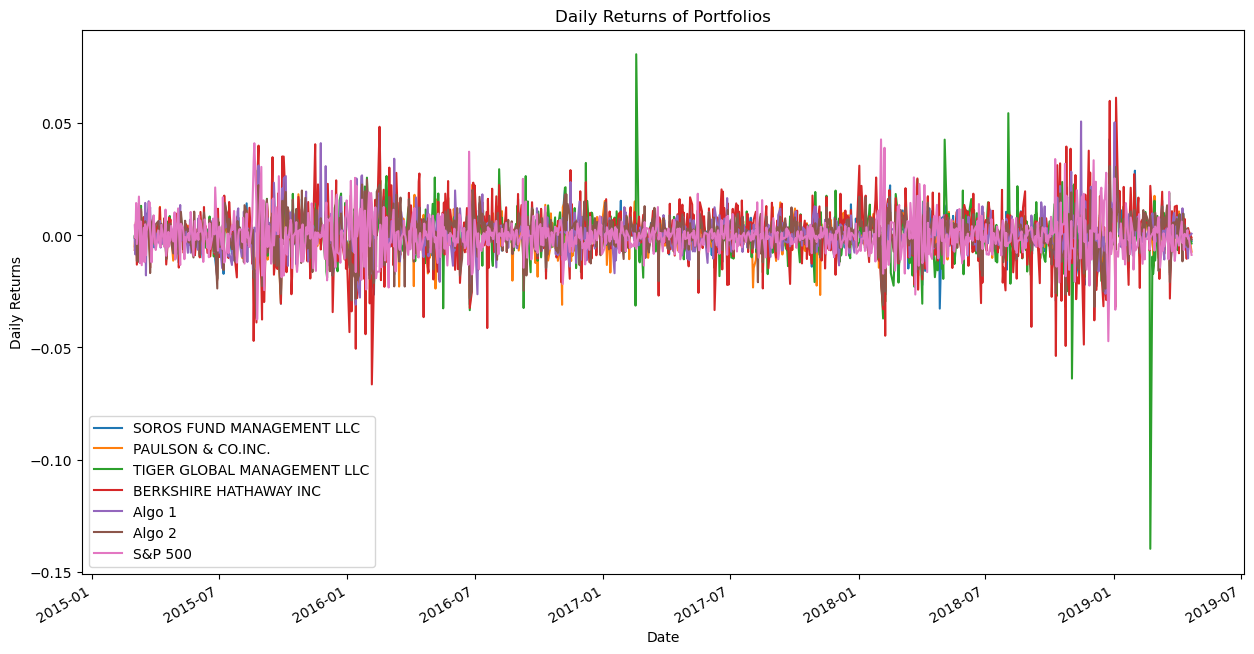

In [219]:
# Plot daily returns of all portfolios
import matplotlib.pyplot as plt
combined_returns.plot(title="Daily Returns of Portfolios", figsize=(15, 8))
plt.ylabel("Daily Returns")
plt.xlabel("Date")
plt.show()

#### Calculate and Plot cumulative returns.

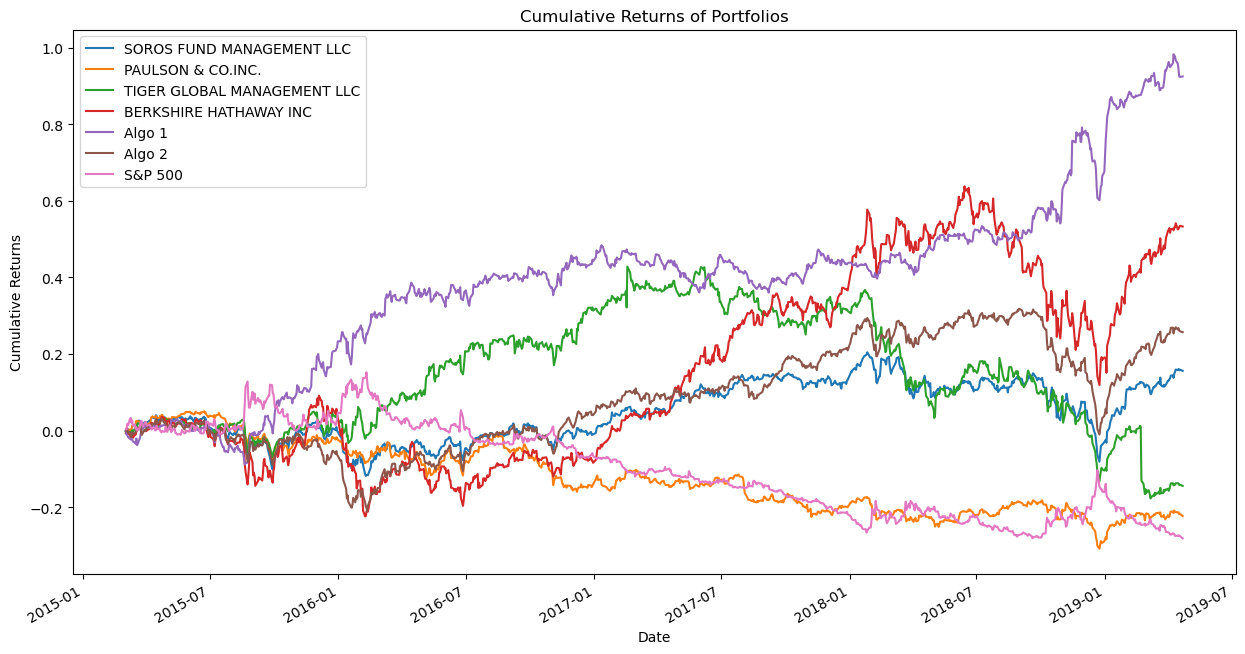

In [316]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(title="Cumulative Returns of Portfolios", figsize=(15, 8))
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


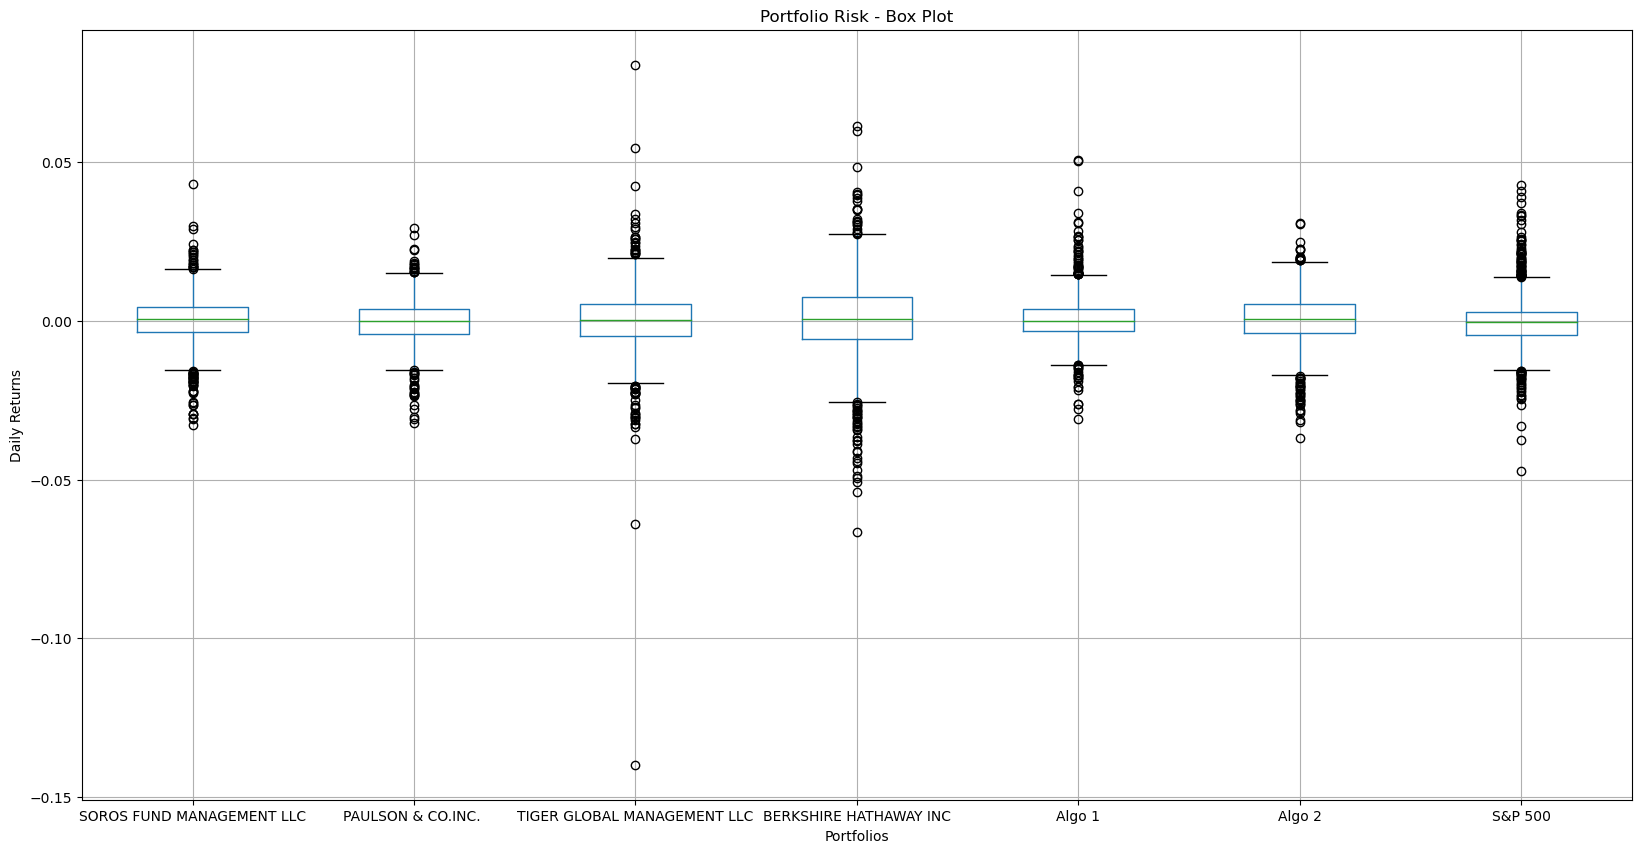

In [317]:
# Box plot to visually show risk
import seaborn as sns
combined_returns.boxplot(figsize=(20, 10))
plt.title("Portfolio Risk - Box Plot")
plt.ylabel("Daily Returns")
plt.xlabel("Portfolios")
plt.show()

### Calculate Standard Deviations

In [318]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = combined_returns.std()
print(daily_std_dev)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [371]:
# Calculate the daily standard deviation of S&P 500
sp500_std_dev = sp500_daily_returns.std()
print("S&P 500 Daily Standard Deviation:", sp500_std_dev.values[0])

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std_dev[daily_std_dev > sp500_std_dev.values[0]].index

if len(riskier_portfolios) > 0:
    print("Portfolios riskier than S&P 500:", list(riskier_portfolios))
    for portfolio in riskier_portfolios:
        risk_comparison = "riskier" if daily_std_dev[portfolio] > sp500_std_dev.values[0] else "less risky"
        print(f"{portfolio} is {risk_comparison} than S&P 500.")
else:
    print("No portfolios are riskier than S&P 500.")


S&P 500 Daily Standard Deviation: 0.009584331885992458
Portfolios riskier than S&P 500: ['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']
TIGER GLOBAL MANAGEMENT LLC is riskier than S&P 500.
BERKSHIRE HATHAWAY INC is riskier than S&P 500.


### Calculate the Annualized Standard Deviation

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64


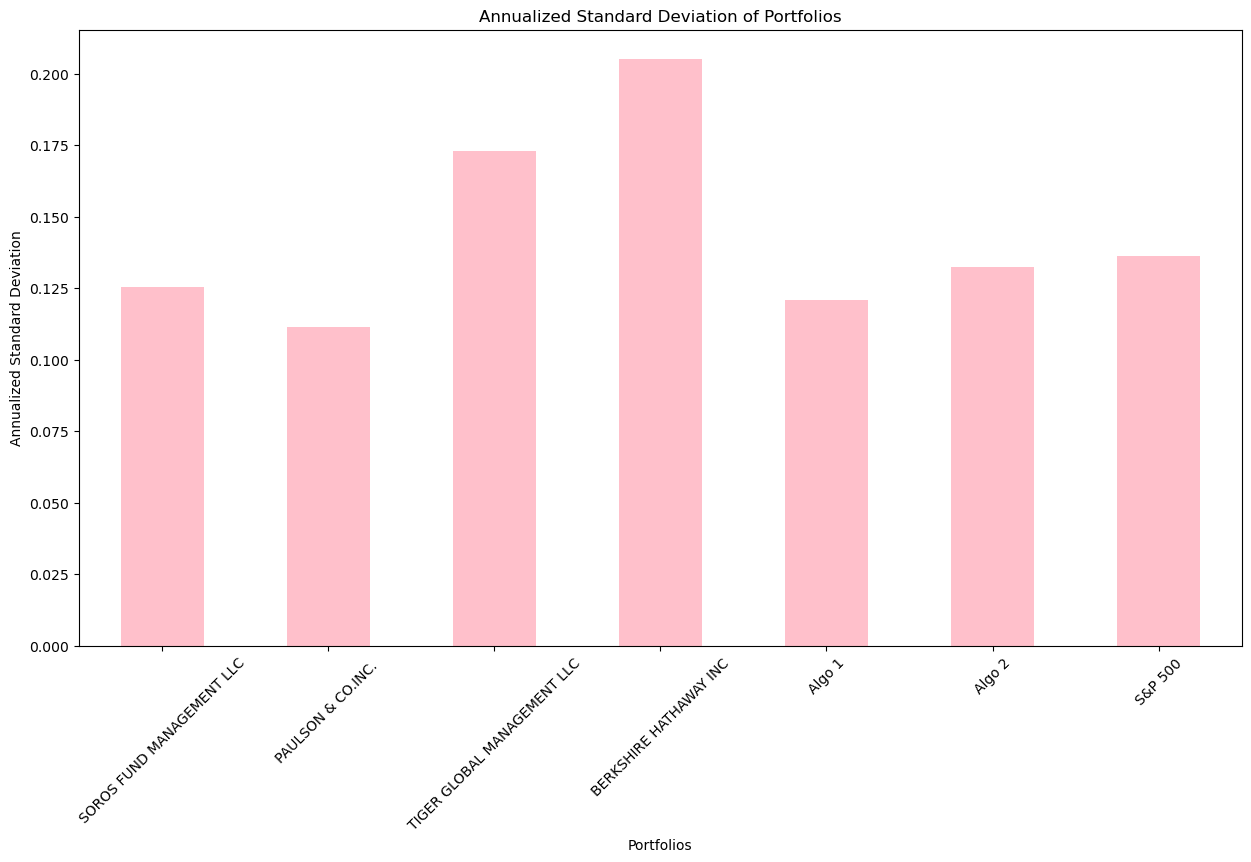

In [321]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
print (annualized_std_dev)

annualized_std_dev.plot(kind="bar", figsize=(15, 8), rot=45, color="pink")
plt.title("Annualized Standard Deviation of Portfolios")
plt.ylabel("Annualized Standard Deviation")
plt.xlabel("Portfolios")
plt.show()

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

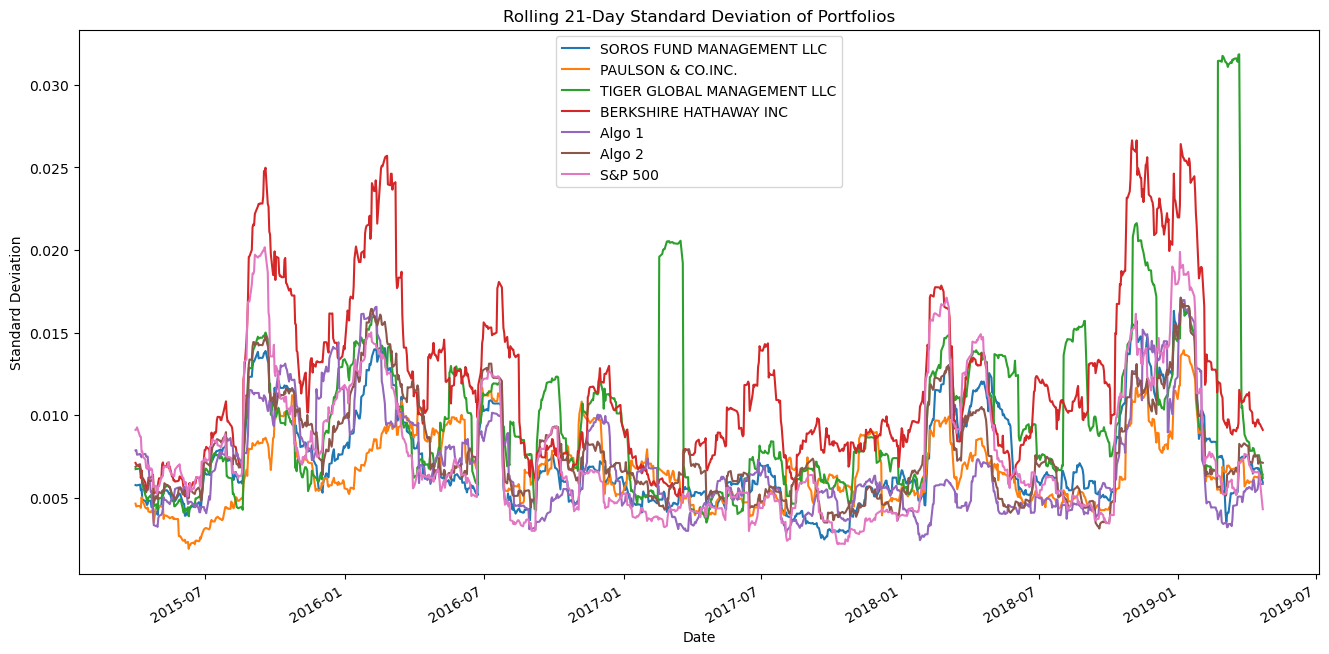

In [323]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = combined_returns.rolling(window=21).std()
rolling_std_dev.dropna(inplace=True)

# Plot the rolling standard deviation
rolling_std_dev.plot(title="Rolling 21-Day Standard Deviation of Portfolios", figsize=(16, 8))
plt.ylabel("Standard Deviation")
plt.xlabel("Date")
plt.show()

### Calculate and plot the correlation

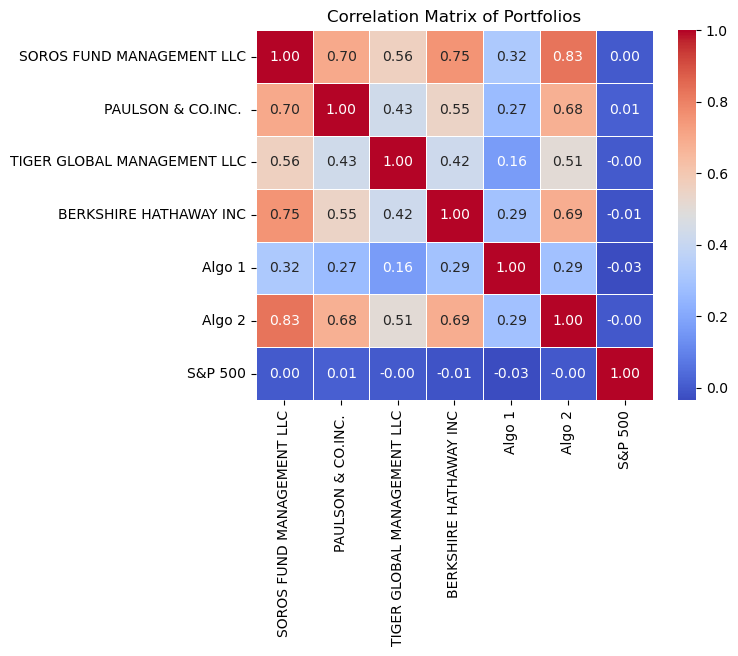

In [324]:
# Calculate the correlation
correlation_matrix = combined_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f")
plt.title("Correlation Matrix of Portfolios")
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

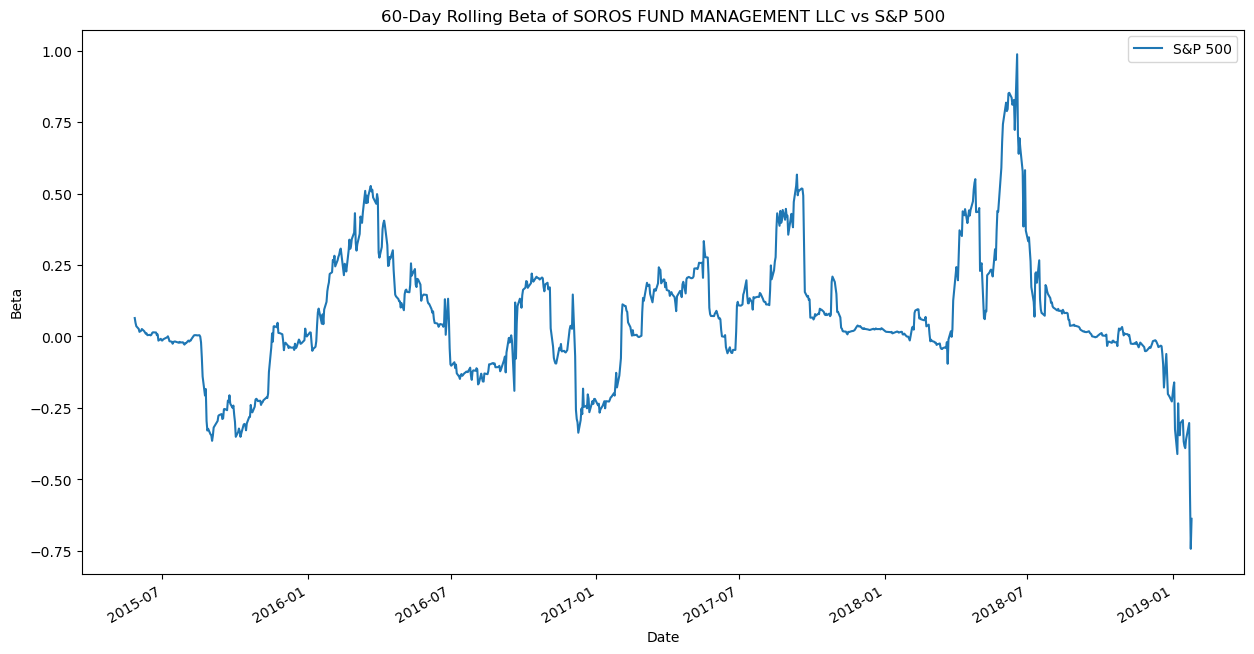

In [325]:
# Calculate covariance of a single portfolio
chosen_portfolio = "SOROS FUND MANAGEMENT LLC"
covariance = combined_returns[chosen_portfolio].rolling(window=60).cov(sp500_daily_returns)

# Calculate variance of S&P 500
variance = sp500_daily_returns.rolling(window=60).var()

# Computing beta
rolling_beta = covariance / variance

# Plot beta trend
rolling_beta.plot(title=f"60-Day Rolling Beta of {chosen_portfolio} vs S&P 500", figsize=(15, 8))
plt.ylabel("Beta")
plt.xlabel("Date")
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

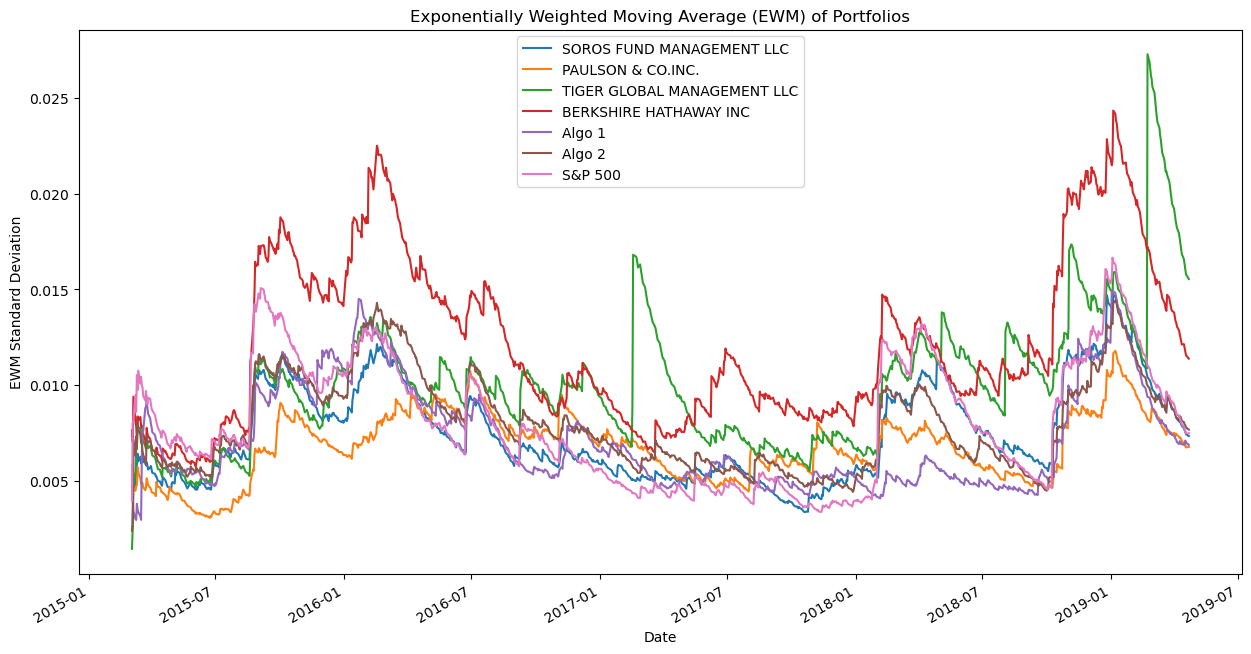

In [326]:
# Use `ewm` to calculate the rolling window
ewm_std_dev = combined_returns.ewm(halflife=21).std()

ewm_std_dev.plot(title="Exponentially Weighted Moving Average (EWM) of Portfolios", figsize=(15, 8))
plt.ylabel("EWM Standard Deviation")
plt.xlabel("Date")
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [327]:
# Annualized Sharpe Ratios
print ('Annualized Sharpe Ratios')

# Calculate the daily returns
daily_returns = combined_returns

# Calculate the average daily return for each portfolio
avg_daily_return = daily_returns.mean()

# Calculate the risk-free rate (assumed to be 0 for this example)
risk_free_rate = 0

# Calculate the daily standard deviation for each portfolio
std_dev = daily_returns.std()

# Calculate the Sharpe ratio for each portfolio
sharpe_ratios = (avg_daily_return - risk_free_rate) / std_dev

# Annualized Sharpe Ratios (assuming 252 trading days)
annualized_sharpe_ratios = sharpe_ratios * np.sqrt(252)
print (annualized_sharpe_ratios)

Annualized Sharpe Ratios
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64


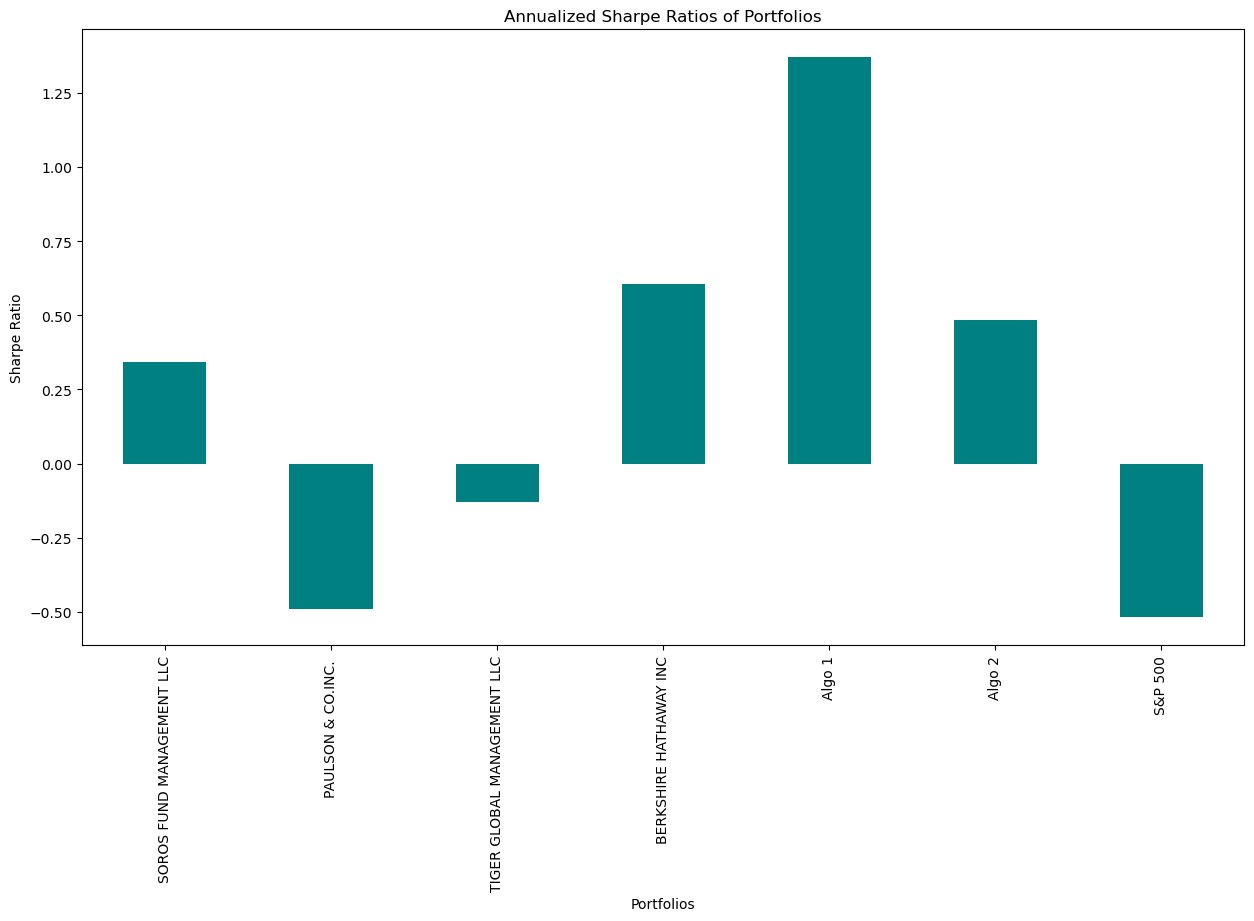

In [328]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind="bar", figsize=(15, 8), color="teal")
plt.title("Annualized Sharpe Ratios of Portfolios")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Portfolios")
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
The Annualized Sharpe Ratios provide a measure of risk-adjusted performance for various portfolios. Among the portfolios, Algo 1 exhibits the highest positive risk-adjusted performance with a Sharpe Ratio of 1.369589, indicating strong returns relative to its risk. In contrast, PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC have negative Sharpe Ratios, signifying suboptimal risk-adjusted performance. SOROS FUND MANAGEMENT LLC and BERKSHIRE HATHAWAY INC also show positive Sharpe Ratios, reflecting positive risk-adjusted returns. The S&P 500, however, displays a negative Sharpe Ratio, indicating comparatively lower risk-adjusted performance. Overall, Algo 1 stands out as the portfolio with the most favorable risk-adjusted performance among the options considered.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [329]:
# Reading data from 1st stock
aapl_path = "aapl_historical.csv"
aapl_data = pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True)

In [330]:
# Reading data from 2nd stock
cost_path = "cost_historical.csv"
cost_data = pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True)

In [331]:
# Reading data from 3rd stock
goog_path = "goog_historical.csv"
goog_data = pd.read_csv(goog_path, index_col="Trade DATE", parse_dates=True)

In [332]:
# Combine all stocks in a single DataFrame
all_stocks_data = pd.concat([aapl_data["NOCP"], cost_data["NOCP"], goog_data["NOCP"]], axis=1)

In [333]:
# Reset Date index
all_stocks_data.reset_index(inplace=True)

In [334]:
# Reorganize portfolio data by having a column per symbol
all_stocks_data.columns = ["Date", "AAPL", "COST", "GOOG"]

In [337]:
# Calculate daily returns
all_stocks_returns = all_stocks_data.set_index("Date").pct_change()

# Drop NAs
all_stocks_returns.dropna(inplace=True)

# Display sample data
all_stocks_returns.head()

,AAPL,COST,GOOG
Date,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [339]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = all_stocks_returns.dot(weights)

# Display sample data
print(portfolio_returns)

Date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [340]:
# Join your returns DataFrame to the original returns DataFrame
all_stocks_returns["Portfolio"] = portfolio_returns

In [370]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_stocks_returns.dropna(subset=["Portfolio"], inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [342]:
# Calculate the annualized `std`
annualized_std = all_stocks_returns.std() * (252 ** 0.5)
print (annualized_std)

AAPL         0.300387
COST         0.213344
GOOG         0.265322
Portfolio    0.212131
dtype: float64


### Calculate and plot rolling `std` with 21-day window

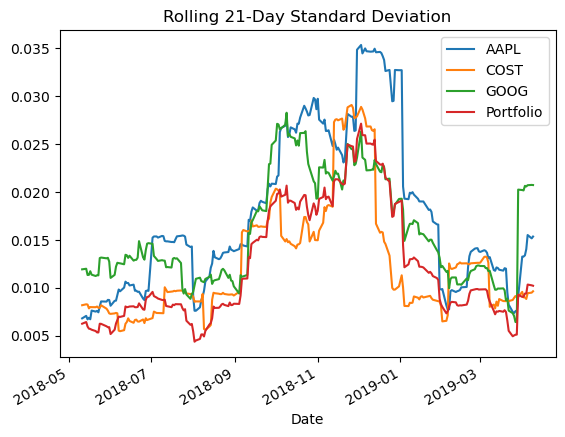

In [343]:
# Calculate rolling standard deviation
rolling_std = all_stocks_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(title='Rolling 21-Day Standard Deviation')
plt.show()

### Calculate and plot the correlation

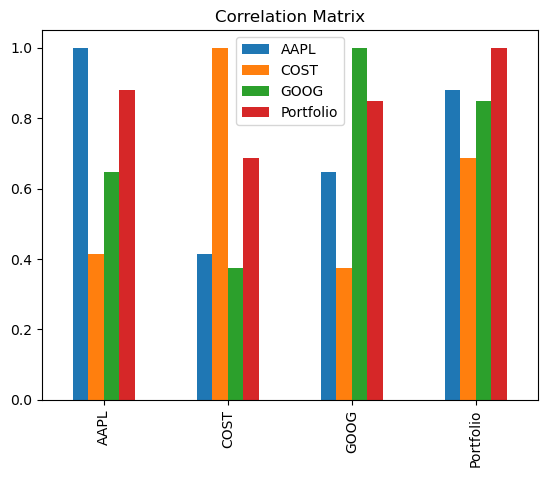

In [344]:
# Calculate and plot the correlation
correlation_matrix = all_stocks_returns.corr()
correlation_matrix.plot(kind='bar', title='Correlation Matrix')
plt.show()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

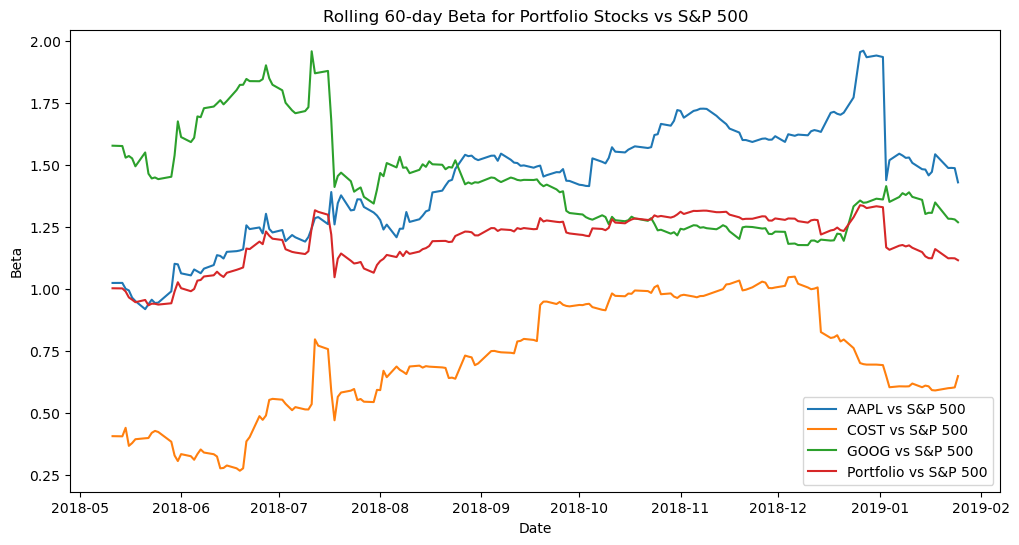

In [366]:
# Calculate and plot Beta

all_stocks_returns = all_stocks_returns.loc[common_dates]
sp500_daily_returns = sp500_daily_returns.loc[common_dates]

# Plot rolling Beta
plt.figure(figsize=(12, 6))
for stock in all_stocks_returns.columns:
    rolling_beta_stock = all_stocks_returns[stock].rolling(window=60).cov(sp500_daily_returns) / sp500_daily_returns.rolling(window=60).var()
    plt.plot(rolling_beta_stock, label=f"{stock} vs S&P 500")

plt.title("Rolling 60-day Beta for Portfolio Stocks vs S&P 500")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [291]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_stocks_returns.mean() * 252) / (all_stocks_returns.std() * np.sqrt(252))
print (sharpe_ratios)

AAPL        -0.061751
COST        -0.929405
GOOG        -0.084987
Portfolio   -0.376153
dtype: float64


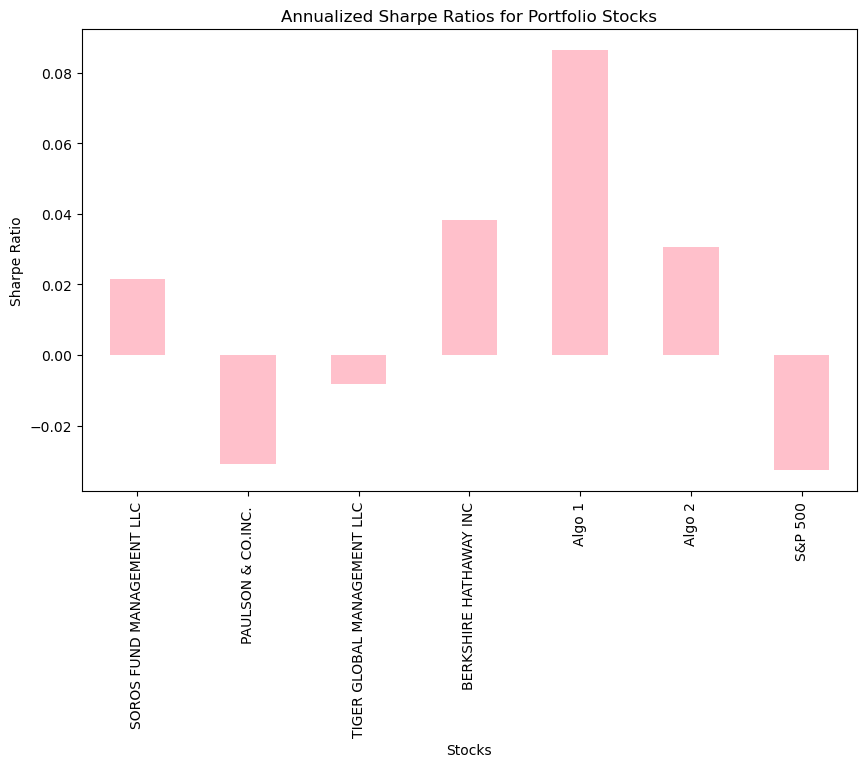

In [367]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', color='pink')
plt.title('Annualized Sharpe Ratios for Portfolio Stocks')
plt.xlabel('Stocks')
plt.ylabel('Sharpe Ratio')
plt.show()

### How does your portfolio do?

Upon reviewing the annualized Sharpe ratios for my custom portfolio, which comprises AAPL, COST, and GOOG, along with an aggregate portfolio metric, I observe that the performance in terms of risk-adjusted returns is less favorable. AAPL, with a Sharpe ratio of -0.061751, COST at -0.929405, and GOOG at -0.084987, all demonstrated negative values, indicating that the return per unit of risk may not have been as promising. The overall portfolio also echoed this trend with a Sharpe ratio of -0.376153. In comparison to previously analyzed funds and the S&P 500, my custom portfolio exhibited lower (or negative) risk-adjusted returns. For instance, renowned funds like SOROS FUND MANAGEMENT LLC and BERKSHIRE HATHAWAY INC showcased positive Sharpe ratios of 0.342894 and 0.606743, respectively. Even the S&P 500, with a Sharpe ratio of -0.518582, surpassed my custom portfolio in terms of risk-adjusted performance. This analysis suggests that my current portfolio composition may not be optimizing returns relative to the risk involved. I may want to reassess my investment strategy, possibly exploring alternative assets or adjusting the weightings within the portfolio to enhance risk-adjusted returns.